In [0]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
fifa = pd.read_csv(io.BytesIO(uploaded['fifa.csv']))
fifa.shape
fifa_data = pd.read_csv(io.BytesIO(uploaded['fifa_+variable_information.csv']))
fifa_data.shape

Saving fifa.csv to fifa.csv


KeyError: ignored

In [0]:
print(fifa.shape)
#print(fifa_data.shape)



(18207, 60)


In [0]:
fifa.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [0]:
up_fifa= fifa.drop(columns=['Photo','Flag','Club Logo'])
up_fifa.shape[0]
up_fifa['Value'].iloc[18183]

'€0'

In [0]:
up_fifa= fifa.drop(columns=['Photo','Flag','Club Logo'])
up_fifa['Value']  = up_fifa['Value'].apply(lambda x: str(x)[:-1])
up_fifa['Value'] = up_fifa['Value'].apply(lambda x:str(x)[1:])
up_fifa['Value'] = pd.to_numeric(up_fifa['Value'])
up_fifa.isna().sum()

  
#Remove Euro and K/M float from Value column
#up_fifa.info()
#up_fifa[['Value','Wage','Release Clause']].head()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [0]:
#Remove Euro and K/M float from Wage column
up_fifa['Wage']  = up_fifa['Wage'].map(lambda x: str(x)[:-1])
up_fifa['Wage'] = up_fifa['Wage'].map(lambda x:str(x)[1:])
up_fifa['Wage'] = pd.to_numeric(up_fifa['Wage'],errors='coerce')
up_fifa['Wage'].isna().sum()
#up_fifa[['Value','Wage','Release Clause']].head()

241

In [0]:
#Remove Euro and K/M float from  Release Clause column
up_fifa['Release Clause']  = up_fifa['Release Clause'].map(lambda x: str(x)[:-1])
up_fifa['Release Clause'] = up_fifa['Release Clause'].map(lambda x:str(x)[1:])
up_fifa['Release Clause'] = pd.to_numeric(up_fifa['Release Clause'],errors='coerce')
up_fifa['Release Clause'] =up_fifa['Release Clause'].fillna(up_fifa['Release Clause'].mean())
#up_fifa[['Value','Wage','Release Clause']].head()

up_fifa['Release Clause'].isna().sum()

0

In [0]:
#Conversion to Year only format for Joined column

up_fifa['Joined']= pd.to_datetime(up_fifa['Joined'])
up_fifa['Joined'] = up_fifa['Joined'].dt.strftime('%Y')

#Conversion to datetime format for Contract Valid Until column
#up_fifa['Contract Valid Until'] = pd.to_datetime(up_fifa['Contract Valid Until'])



#Conversion of Height column to float type
up_fifa['Height'] = up_fifa['Height'].map(lambda x:str(x).replace("'",'.')).dropna(how='all')
up_fifa['Height'] = up_fifa['Height'].dropna()
pd.to_numeric(up_fifa['Height'],errors='coerce')
up_fifa.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2004,NaN,2021,5.7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,NaN,2022,6.2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,2017,NaN,2022,5.9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1


In [0]:
# up_fifa= fifa.drop(columns=['Photo','Flag','Club Logo'])
# up_fifa.shape[0]
#convert to float after removing lbs
up_fifa['Weight'] = up_fifa['Weight'].map(lambda x:str(x)[0:3])
up_fifa['Weight']= pd.to_numeric(up_fifa['Weight'],errors='coerce')
up_fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2004,NaN,2021,5.7,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,NaN,2022,6.2,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,2017,NaN,2022,5.9,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,NaN,2020,6.4,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,355.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,2015,NaN,2023,5.11,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


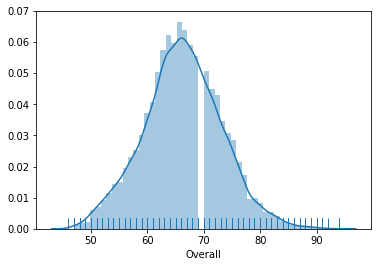

In [0]:
#Distribution plot for overall rating of all the players

import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(up_fifa['Overall'],rug=True)



In [0]:
#Generate pair plots for the following variables:
#Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

sns.pairplot(up_fifa,hue='Overall')





/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in l

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fc101348950> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
#Top 20 Overall rated players with contract valid upto 2020
sorted_top = up_fifa.sort_values(by='Overall',ascending=False).head(20)
sorted_top_exp = sorted_top[sorted_top['Contract Valid Until']=='2020']
sorted_top_exp


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,NaN,2020,6.4,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93.0,340.0,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,2012,NaN,2020,5.8,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67.0,420.0,Right,4.0,4.0,4.0,High/ High,Lean,RCM,10.0,2012,NaN,2020,5.8,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51.0,380.0,Right,4.0,3.0,3.0,High/ Medium,Normal,RCB,15.0,2005,NaN,2020,6.0,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6
13,168542,David Silva,32,Spain,90,90,Manchester City,60.0,285.0,Left,4.0,2.0,4.0,High/ Medium,Normal,LCM,21.0,2010,NaN,2020,5.8,148.0,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27.0,215.0,Left,4.0,3.0,2.0,Medium/ High,Normal,LCB,3.0,2005,NaN,2020,6.2,187.0,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44.6
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60.0,200.0,Right,4.0,4.0,3.0,High/ High,Lean,LS,21.0,2013,NaN,2020,6.1,170.0,70.0,89.0,89.0,78.0,90.0,80.0,77.0,76.0,52.0,82.0,75.0,76.0,77.0,91.0,59.0,87.0,88.0,92.0,78.0,79.0,84.0,48.0,93.0,77.0,85.0,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111.0


In [0]:
#Average Wage of the Players
sorted_top_exp['Wage'].mean()

300.0

In [0]:
#Average Age of the players
sorted_top_exp['Age'].mean()

30.571428571428573

In [0]:
#Correlation between overall rating and Value of the player 
sorted_top_exp[['Overall','Value']].corr()


,Overall,Value
Overall,1.000000,0.635825
Value,0.635825,1.000000


In [0]:
for position in up_fifa['Position'].unique():
  sd = up_fifa[up_fifa['Position']== position].sort_values(by='Overall',ascending= False).head(5)
  print(sd[['Name','Position','Value','Overall']])
  print(f"Average Wage for {position} is :",sd['Wage'].mean())
up_fifa['Name'].value_counts()
up_fifa['Position'].unique()
#up_fifa[up_fifa['Position'].isin(up_fifa['Position'].unique())].shape

(18207, 57)